# 3 Creating feature

Once you've identified a set of features with some potential, it's time to start developing them. In this lesson, you'll learn a number of common transformations you can do entirely in Pandas. 

We'll use four datasets in this lesson having a range of feature types:

- [concrete.csv](https://www.kaggle.com/datasets/sinamhd9/concrete-comprehensive-strength)
- [customer.csv](https://www.kaggle.com/datasets/pankajjsh06/ibm-watson-marketing-customer-value-data)
- [accidents.csv](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents)
- [autos.csv](https://www.kaggle.com/datasets/toramky/automobile-dataset)

**Some Tips on Discovering New Features**:
- Understand the features. Refer to your dataset's data documentation, if available.
- Research the problem domain to acquire domain knowledge. If your problem is predicting house prices, do some research on real-estate for instance. Wikipedia can be a good starting point, but books and journal articles will often have the best information.
- Study previous work. Solution write-ups from past Kaggle competitions are a great resource.
- Use data visualization. Visualization can reveal pathologies in the distribution of a feature or complicated relationships that could be simplified. Be sure to visualize your dataset as you work through the feature engineering process.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# configure graph layout
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [2]:
accidents_path = "../data/accidents.csv"
autos_path = "../data/autos.csv"
concrete_path = "../data/concrete.csv"
customer_path = "../data/customer.csv"

In [3]:
accidents = pd.read_csv(accidents_path)
autos = pd.read_csv(autos_path)
concrete = pd.read_csv(concrete_path)
customer = pd.read_csv(customer_path)

## 3.1 Mathematical Transforms

Relationships among numerical features are often expressed through mathematical formulas, which you'll frequently come across as part of your domain research. In Pandas, you can apply arithmetic operations to columns just as if they were ordinary numbers.

In the Automobile dataset, there are features describing a car's engine (e.g. stroke, bore, etc.). For example, we can create a new feature the "stroke ratio", which can measure of how efficient an engine is versus how performant

In [5]:
autos.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [6]:
autos["stroke_ratio"] = autos.stroke / autos.bore
autos[["stroke", "bore", "stroke_ratio"]].head()

,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.40,3.19,1.065831
4,3.40,3.19,1.065831


The more complicated a combination is, the more difficult it will be for a model to learn, like below formula for an engine's "displacement", a measure of its power:

In [10]:
autos["displacement"] = (np.pi * ((0.5 * autos.bore) ** 2) * autos.stroke * autos.num_of_cylinders)

Data visualization can suggest transformations, often a "reshaping" of a feature through powers or logarithms. The distribution of WindSpeed in US Accidents is highly skewed, for instance. In this case the logarithm is effective at normalizing it:

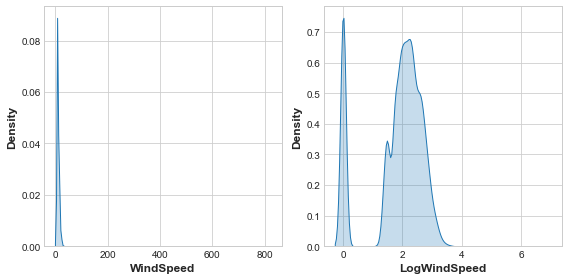

In [11]:
# If the feature has 0.0 values, use np.log1p (log(1+x)) instead of np.log
accidents["LogWindSpeed"] = accidents.WindSpeed.apply(np.log1p)

# Plot a comparison
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(accidents.WindSpeed, shade=True, ax=axs[0])
sns.kdeplot(accidents.LogWindSpeed, shade=True, ax=axs[1]);

Check out the kaggle lesson on [normalization](https://www.kaggle.com/code/alexisbcook/scaling-and-normalization/tutorial) in Data Cleaning where you'll also learn about the Box-Cox transformation, a very general kind of normalizer.

## 3.2 Counts

Features describing the presence or absence of something often come in sets, the set of risk factors for a disease,You can aggregate such features by creating a count.

These features will be binary (1 for Present, 0 for Absent) or boolean (True or False). In Python, booleans can be added up just as if they were integers.

In Traffic Accidents are several features indicating whether some roadways object was near the accident. This will create a count of the total number of roadway features nearby using the sum method:

In [12]:
accidents.head()

,Severity,StartTime,EndTime,StartLat,StartLng,Distance,Street,City,State,Zipcode,...,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,LogWindSpeed
0,2,2019-07-22 14:43:06,2019-07-22 16:22:19,34.789009,-82.483383,0.000,Highway 153,Greenville,SC,29611,...,False,False,False,False,False,False,False,False,False,2.833213
1,2,2019-03-20 16:12:14,2019-03-20 16:41:05,40.998264,-76.650396,0.472,Continental Blvd,Danville,PA,17821,...,False,False,False,False,False,False,False,False,False,2.322388
2,3,2018-12-12 14:19:18,2018-12-12 14:48:56,33.461292,-112.082001,0.000,I-10 W,Phoenix,AZ,85003,...,False,False,False,False,False,False,False,False,False,2.208274
3,2,2018-03-09 08:02:11,2018-03-09 08:49:15,42.288445,-87.924911,0.000,Oak Spring Rd,Libertyville,IL,60048,...,False,False,False,False,False,False,False,False,False,1.916923
4,2,2020-03-27 05:36:56,2020-03-27 06:36:48,36.229259,-86.594650,0.000,Saundersville Rd,Old Hickory,TN,37138,...,False,False,False,False,False,False,False,False,False,2.079442


In [16]:
roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
                    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
                    "TrafficCalming", "TrafficSignal"]
accidents["RoadwayFeatures"] = accidents[roadway_features].sum(axis=1)

accidents_roadway_features = accidents[roadway_features + ["RoadwayFeatures"]]

# axis=0 (default value) means sort dataframe by rows, if axis=1, it will sort by column.
accidents_roadway_features.sort_values("RoadwayFeatures",axis=0,ascending=False).head()

,Amenity,Bump,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,RoadwayFeatures
76117,True,False,True,True,False,False,True,False,True,False,False,True,6
88150,True,False,True,False,False,True,True,False,True,False,False,True,6
32933,True,False,True,False,False,False,True,False,True,False,False,True,5
81616,True,False,True,False,False,False,False,False,True,True,False,True,5
75236,True,False,True,False,False,False,True,False,True,False,False,True,5


You could also use a dataframe's built-in methods to create boolean values. In the Concrete dataset are the amounts of components in a concrete formulation. Many formulations lack one or more components (that is, the component has a value of 0). This will count how many components are in a formulation with the dataframe's built-in greater-than gt method:

In [17]:
components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]
concrete["Components"] = concrete[components].gt(0).sum(axis=1)

concrete[components + ["Components"]].head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


## 3.3 Building-Up and Breaking-Down Features

Often you'll have complex strings that can usefully be broken into simpler pieces. Some common examples:

ID numbers: '123-45-6789'
Phone numbers: '(999) 555-0123'
Street addresses: '8241 Kaggle Ln., Goose City, NV'
Internet addresses: 'http://www.kaggle.com
Product codes: '0 36000 29145 2'
Dates and times: 'Mon Sep 30 07:06:05 2013'

Features like these will often have some kind of structure that you can make use of. US phone numbers, for instance, have an area code (the '(999)' part) that tells you the location of the caller. As always, some research can pay off here.

The str accessor lets you apply string methods like split directly to columns. The Customer Lifetime Value dataset contains features describing customers of an insurance company. From the Policy feature, we could separate the Type from the Level of coverage:

In [18]:
customer[["Type", "Level"]] = (  # Create two new features
    customer["Policy"]           # from the Policy feature
    .str                         # through the string accessor
    .split(" ", expand=True)     # by splitting on " "
                                 # and expanding the result into separate columns
)

In [19]:
customer[["Policy", "Type", "Level"]].head(10)

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1
5,Personal L3,Personal,L3
6,Corporate L3,Corporate,L3
7,Corporate L3,Corporate,L3
8,Corporate L3,Corporate,L3
9,Special L2,Special,L2


You could also join simple features into a composed feature if you had reason to believe there was some interaction in the combination:

In [20]:
autos["make_and_style"] = autos["make"] + "_" + autos["body_style"]
autos[["make", "body_style", "make_and_style"]].head()

,make,body_style,make_and_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


#### For combining specific type of columns:

There are a few other kinds of data we haven't talked about here that are especially rich in information. Fortunately, we've got you covered!

- For dates and times, see [Parsing Dates](https://www.kaggle.com/code/alexisbcook/parsing-dates/tutorial) from our Data Cleaning course.
- For latitudes and longitudes, see our [Geospatial Analysis](https://www.kaggle.com/learn/geospatial-analysis) course.
- For text, try Natural Language Processing.

## 3.4 Group Transforms

Finally, we have Group transforms, which aggregate information across multiple rows grouped by some category. With a group transform you can create features like: "the average income of a person's state of residence," or "the proportion of movies released on a weekday, by genre." If you had discovered a category interaction, a group transform over that category could be something good to investigate.

Using an aggregation function, a group transform combines two features: a categorical feature that provides the grouping and another feature whose values you wish to aggregate. For an "average income by state", you would choose State for the grouping feature, mean for the aggregation function, and Income for the aggregated feature. To compute this in Pandas, we use the groupby and transform methods:

In [21]:
customer["AverageIncome"] = (
    customer.groupby("State")  # for each state
    ["Income"]                 # select the income
    .transform("mean")         # and compute its mean
)

customer[["State", "Income", "AverageIncome"]].head(10)

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
5,Oregon,62902,37557.283353
6,Oregon,55350,37557.283353
7,Arizona,0,37405.402231
8,Oregon,14072,37557.283353
9,Oregon,28812,37557.283353


The mean function is a built-in dataframe method, which means we can pass it as a string to transform. Other handy methods include max, min, median, var, std, and count. Here's how you could calculate the frequency with which each state occurs in the dataset:

In [22]:
customer["StateFreq"] = (
    customer.groupby("State")
    ["State"]
    .transform("count")
    / customer.State.count()
)

customer[["State", "StateFreq"]].head(10)

,State,StateFreq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366
5,Oregon,0.284760
6,Oregon,0.284760
7,Arizona,0.186446
8,Oregon,0.284760
9,Oregon,0.284760


You could use a transform like this to create a "frequency encoding" for a categorical feature.

If you're using training and validation splits, to preserve their independence, it's best to create a grouped feature using only the training set and then join it to the validation set. We can use the validation set's merge method after creating a unique set of values with drop_duplicates on the training set:

In [24]:
# Create splits
df_train = customer.sample(frac=0.5)
df_valid = customer.drop(df_train.index)

# Create the average claim amount by coverage type, on the training set
df_train["AverageClaim"] = df_train.groupby("Coverage")["ClaimAmount"].transform("mean")

# Merge the values into the validation set
df_valid = df_valid.merge(
    df_train[["Coverage", "AverageClaim"]].drop_duplicates(),
    on="Coverage",
    how="left",
)

df_valid[["Coverage", "AverageClaim"]].head(10)

,Coverage,AverageClaim
0,Extended,473.273348
1,Basic,373.287674
2,Basic,373.287674
3,Basic,373.287674
4,Extended,473.273348
5,Basic,373.287674
6,Premium,635.333049
7,Basic,373.287674
8,Basic,373.287674
9,Basic,373.287674


## Tips on Creating Features
It's good to keep in mind your model's own strengths and weaknesses when creating features. Here are some guidelines:
- Linear models learn sums and differences naturally, but can't learn anything more complex.
- Ratios seem to be difficult for most models to learn. Ratio combinations often lead to some easy performance gains.
- Linear models and neural nets generally do better with normalized features. Neural nets especially need features scaled to value not too far from 0. Tree-based models (like random forests and XGBoost) can sometimes benefit from normalization, but usually much less so.
- Tree models can learn to approximate almost any combination of features, but when a combination is especially important they can still benefit from having it explicitly created, especially when data is limited.
- Counts are especially helpful for tree models, since these models don't have a natural way of aggregating information across many features at once.